In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('Dynamic_Pricing\dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [19]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [20]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


# EXPLORATORY DATA ANALYSIS

In [21]:
# Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

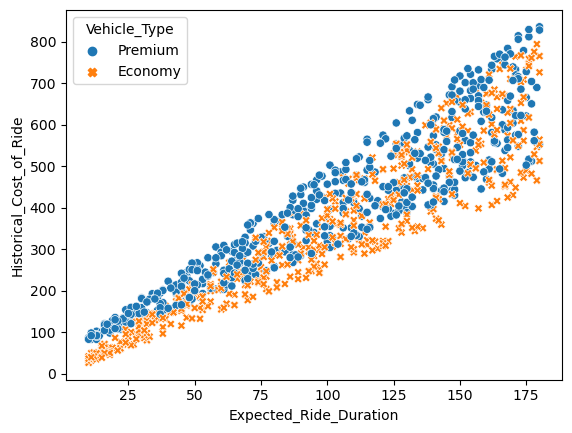

In [4]:
sns.scatterplot(df, x='Expected_Ride_Duration',
                   y='Historical_Cost_of_Ride',
                   hue='Vehicle_Type',
                   style='Vehicle_Type'
                   )

<Axes: xlabel='Expected_Ride_Duration', ylabel='Historical_Cost_of_Ride'>

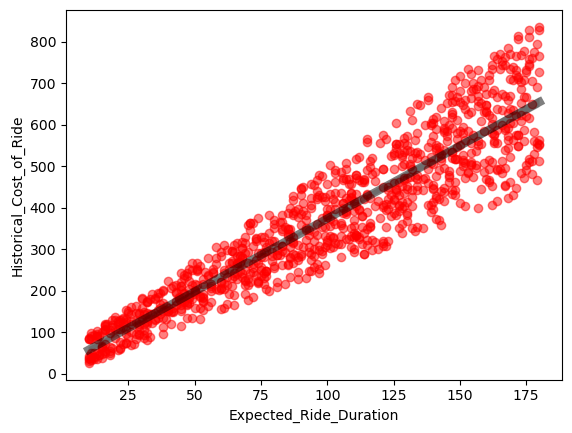

In [5]:
sns.regplot(df, x='Expected_Ride_Duration',
                   y='Historical_Cost_of_Ride', robust=True, scatter_kws={'color':'red', 'alpha':0.5}, line_kws={'color':'black', 'alpha':0.5, 'lw':6})

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

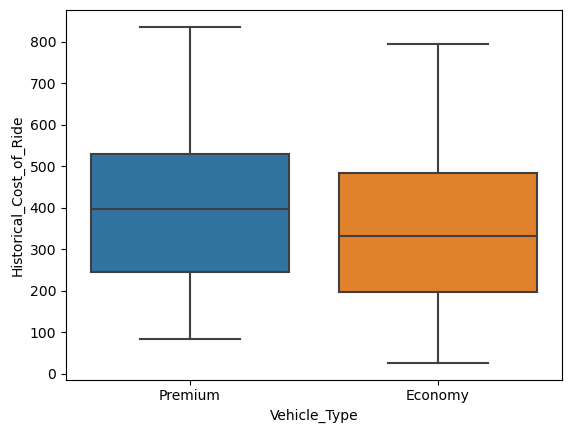

In [6]:
#Evaluating the distribution of historical cost of rides based on vehcile type
sns.boxplot(df, x='Vehicle_Type', y='Historical_Cost_of_Ride')

In [17]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [7]:
#Change categorical objects to numeric types
# df = pd.get_dummies(df, dtype=int)

In [9]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [8]:
#check for categorical data
cat_data=df.select_dtypes(include=['object', 'category'])
cat_data

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
0,Urban,Silver,Night,Premium
1,Suburban,Silver,Evening,Economy
2,Rural,Silver,Afternoon,Premium
3,Rural,Regular,Afternoon,Premium
4,Rural,Regular,Afternoon,Economy
...,...,...,...,...
995,Urban,Gold,Morning,Premium
996,Urban,Regular,Morning,Premium
997,Suburban,Gold,Night,Premium
998,Suburban,Regular,Night,Premium


<Axes: >

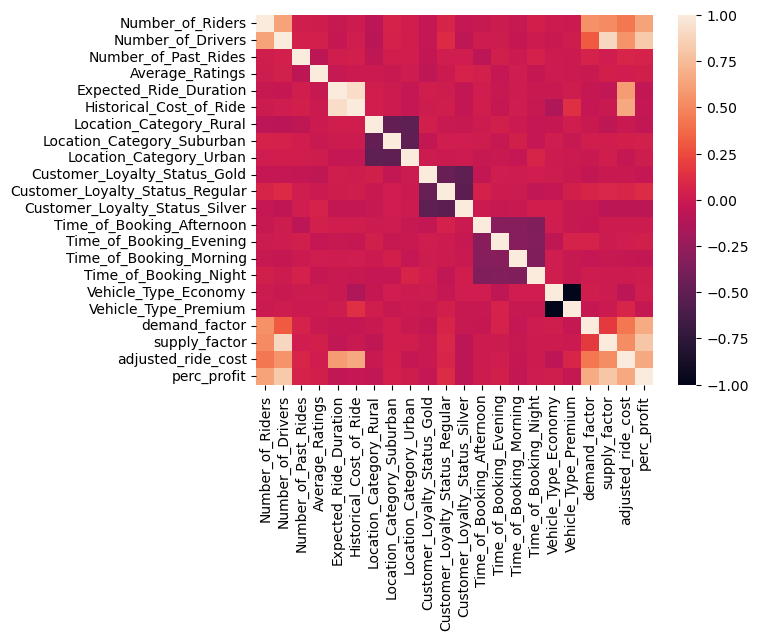

In [45]:
#correlation matrix defining the relationship between different variables
cor_matrix=df.corr()

sns.heatmap(cor_matrix)

In [ ]:
#Checking for categorical and continuous data: Orinal and Norminal
#Ordinalcan be ranked eg: counties' GDP, proffessional ranks, class performance and marks
#Norminal cannot be ranked eg: gender, states and countries


# Implementing the Dynamic Pricing strategy

In [23]:
#Price of a ride is determined by expected rise duration
#low_demand vs. high-supply will lead to price reductions
#High_demand vs low supply will lead to price increase 

In [10]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [12]:
#Percentile for high demand is 75 while for low demand is 25
h_demand_percentile = 75
l_demand_percentile=25

#Assigns high-demand factors for fewer riders and low-demand for many riders
df['demand_factor'] = np.where(df
                                     ['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], h_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], h_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], l_demand_percentile))


#Percentile for high supply is 75 while for low supply is 25
h_supply_percentile = 75
l_supply_percentile = 25

#Assigns high-supply factors for more drivers and low-supply for less drivers
df['supply_factor']= np.where(df
                                     ['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], l_supply_percentile),
                                      df['Number_of_Drivers']/np.percentile(df['Number_of_Drivers'], h_supply_percentile), 
                                      df['Number_of_Drivers']/np.percentile(df['Number_of_Drivers'], l_supply_percentile))


#Defining price adjustements for high and low(demand and supply)
demand_thresh_high = 1.5
demand_thresh_low =0.7
supply_thresh_high = 0.7
supply_thresh_low = 1.5

In [13]:
#Calculate the adjusted_ride_cost results
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (
    np.maximum(df['demand_factor'], demand_thresh_low) *
    np.maximum(df['supply_factor'], supply_thresh_high)
)

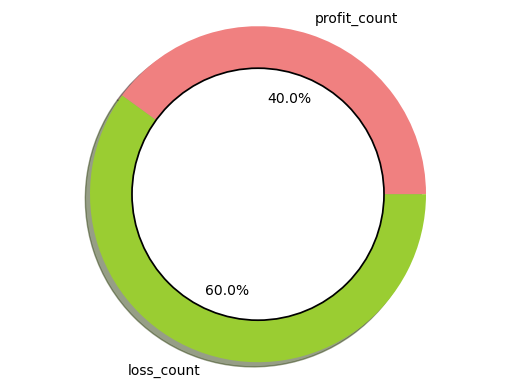

In [14]:
#calculate percentage profit acquired after implemeneting the adjusted_ride_cost strategy
#percentage profit for each ride
df['perc_profit'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride'])/df['Historical_Cost_of_Ride']) * 100

#Show profitable rides signified by profit percentage being positive
profitable_rides= df[df['perc_profit'] > 0]

#Show loss rides signified by profit percentage being negative(net-loss)
loss_rides = df[df['perc_profit'] < 0]

#Profit and loss counts
profit_count = len(profitable_rides)
loss_count = len(loss_rides)

#Chart visualization of profit_count and loss_count
labels =['profit_count', 'loss_count']
sizes = [20, 30]
colors = ['lightcoral', 'yellowgreen']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()  


[Text(0.5, 1.0, 'Expected_Ride_duration vs. adjusted_ride_cost')]

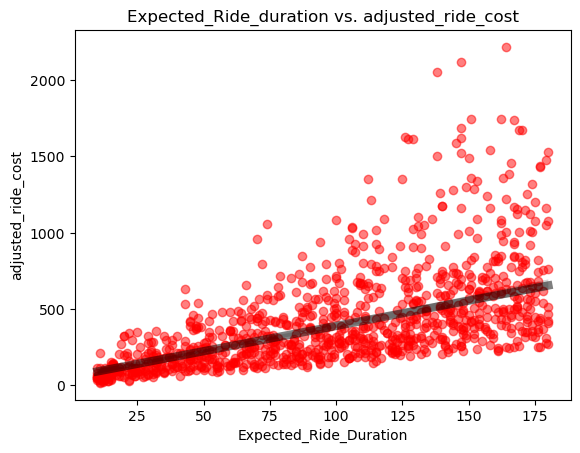

In [15]:
sns.regplot(df, x='Expected_Ride_Duration',
                   y='adjusted_ride_cost', robust=True, scatter_kws={'color':'red', 'alpha':0.5}, line_kws={'color':'black', 'alpha':0.5, 'lw':6}).set(title='Expected_Ride_duration vs. adjusted_ride_cost')

# Training predictive model

In [16]:
from sklearn.preprocessing import StandardScaler

#data preprocessing
def data_preprocessing(df):
    #Showcase numeric and categorical values
    num_features = df.select_dtypes(include=['float', 'int']).columns
    cat_features = df.select_dtypes(include=['object']).columns

    #Handling missing values in numeric features
    df[num_features] = df[num_features].fillna(df[num_features].mean())

    #Detecting outliers in numeric features using InterQuantileRange(IQR)
    for feature in num_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q1 + (1.5 * IQR)
        df[feature]= np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),
                             df[feature].mean(), data[feature])

    #Handling missing values in categorical features
    #Using iloc so that if there are multiple modes, this will select the first occurrence as the filling value 
    df[cat_features] = df[cat_features].fillna(df[cat_features].mode().iloc[0])

    return(df)

In [17]:
df['Vehicle_Type'] = df['Vehicle_Type'].map({'Premium': 1, 'Economy':0})

In [18]:
#Split the learning model to predict cost of a ride
from sklearn .model_selection import train_test_split

X=np.array(df[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y=np.array(df[['adjusted_ride_cost']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

#Reshaping y to a 1D array
y_train=y_train.ravel()
y_test=y_test.ravel()

In [19]:
import statsmodels.api as sm
#training an Ordinary-Least square model
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     569.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          2.16e-255
Time:                        13:51:40   Log-Likelihood:                -6626.6
No. Observations:                1000   AIC:                         1.326e+04
Df Residuals:                     995   BIC:                         1.329e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -341.0082     20.771    -16.417      0.000    -381.769    -300.248
x1             1.8932      0.314      6.033      0.000       1.277       2.509
x2             8.4800      0.390     21.734      0.000       7.714       9.246
x3            38.3376     11.596      3.306      0.001      15.582      61.093
x4             4.0931      0.118     34.722      0.000       3.862       4.324
==============================================================================
Omnibus:                      337.440   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.525
Skew:                           1.426   Prob(JB):                         0.00
Kurtosis:                       9.237   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
#Test the model using some values
def get_V_type(vehicle_type):
    V_type_mapping={'Premium': 1, 'Economy':0}
    V_type_numeric=V_type_mapping.get(vehicle_type)
    return V_type_numeric
    
#Predicting using user input values
def predict_prices(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
     V_type_numeric=get_V_type(vehicle_type)
     if V_type_numeric is None:
        raise ValueError('Invalid Vehicle Type')

     user_input=np.array([[number_of_riders, number_of_drivers, V_type_numeric, Expected_Ride_Duration]])
     price_predicted=model.predict(user_input)
     return price_predicted

In [24]:
user_number_of_riders = 60
user_number_of_drivers = 40
user_vehicle_type = 'Economy'
Expected_Ride_Duration = 5
price_predicted = predict_prices(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", price_predicted)

Predicted price: [61.13905474]


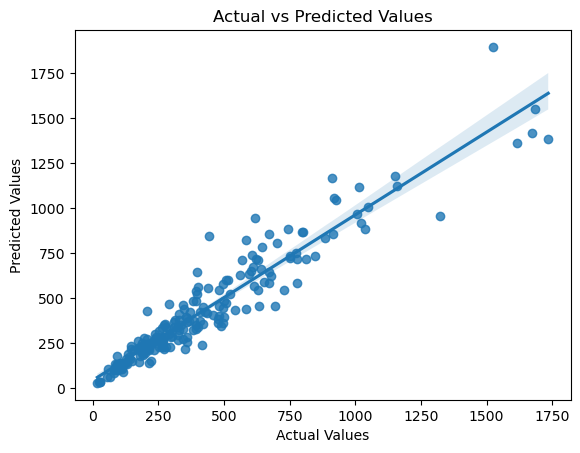

In [25]:
#comparing the actual and predicted results
#predict on the test set
y_pred = model.predict(X_test)



sns.regplot(x=y_test, y=y_pred)  # Creates scatter plot with regression line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()